In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import ssl

**Dataset from DQLab**

In [12]:
ssl._create_default_https_context = ssl._create_unverified_context

In [13]:
url = 'https://storage.googleapis.com/dqlab-dataset/covid19_worldwide_2020.json'
df = pd.read_json(url)

In [14]:
df.head()

,date,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id
0,2020-03-20,1,0,1,0,TD
1,2020-03-21,0,0,1,0,TD
2,2020-03-22,1,0,2,0,TD
3,2020-03-23,0,0,2,0,TD
4,2020-03-24,0,0,2,0,TD


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61900 entries, 0 to 61899
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   61900 non-null  datetime64[ns]
 1   daily_confirmed_cases  61900 non-null  int64         
 2   daily_deaths           61900 non-null  int64         
 3   confirmed_cases        61900 non-null  int64         
 4   deaths                 61900 non-null  int64         
 5   geo_id                 61625 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.3+ MB


In [16]:
df.describe()

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths
count,61900.000000,61900.000000,6.190000e+04,61900.000000
mean,1155.147237,26.055460,1.005831e+05,3101.676785
std,6779.224479,131.227055,6.074374e+05,15538.122301
min,-8261.000000,-1918.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,1.277500e+02,1.000000
50%,15.000000,0.000000,2.047000e+03,42.000000
75%,273.000000,4.000000,2.456775e+04,463.000000
max,234633.000000,4928.000000,1.625675e+07,299177.000000


In [17]:
df = df.set_index('date').sort_index()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61900 entries, 2019-12-31 to 2020-12-14
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   daily_confirmed_cases  61900 non-null  int64 
 1   daily_deaths           61900 non-null  int64 
 2   confirmed_cases        61900 non-null  int64 
 3   deaths                 61900 non-null  int64 
 4   geo_id                 61625 non-null  object
dtypes: int64(4), object(1)
memory usage: 2.8+ MB


In [19]:
df.head()

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id
date,,,,,
2019-12-31,0,0,0,0,IN
2019-12-31,0,0,0,0,IR
2019-12-31,0,0,0,0,PK
2019-12-31,0,0,0,0,AM
2019-12-31,27,0,27,0,CN


In [20]:
df.isna().sum()

daily_confirmed_cases      0
daily_deaths               0
confirmed_cases            0
deaths                     0
geo_id                   275
dtype: int64

In [21]:
df.dropna(inplace=True)
df.isna().sum()

daily_confirmed_cases    0
daily_deaths             0
confirmed_cases          0
deaths                   0
geo_id                   0
dtype: int64

In [22]:
countries_url = "https://storage.googleapis.com/dqlab-dataset/country_details.json"
df_countries = pd.read_json(countries_url)

In [24]:
df_normalized = pd.merge(df.reset_index(), df_countries, on='geo_id').set_index('date')
df_normalized.head()

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name
date,,,,,,
2019-12-31,0,0,0,0,IN,India
2020-01-01,0,0,0,0,IN,India
2020-01-02,0,0,0,0,IN,India
2020-01-03,0,0,0,0,IN,India
2020-01-04,0,0,0,0,IN,India


In [25]:
df_normalized["fatality_ratio"] = df_normalized['deaths']/df_normalized['confirmed_cases']
df_normalized.head()

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name,fatality_ratio
date,,,,,,,
2019-12-31,0,0,0,0,IN,India,NaN
2020-01-01,0,0,0,0,IN,India,NaN
2020-01-02,0,0,0,0,IN,India,NaN
2020-01-03,0,0,0,0,IN,India,NaN
2020-01-04,0,0,0,0,IN,India,NaN


In [26]:
df_top_20_fr = df_normalized.sort_values(by='fatality_ratio', ascending=False).head(20)
df_top_20_fr[['geo_id','country_name','fatality_ratio']]

,geo_id,country_name,fatality_ratio
date,,,
2020-03-15,SD,Sudan,1.0
2020-02-20,IR,Iran,1.0
2020-03-16,GT,Guatemala,1.0
2020-03-13,GY,Guyana,1.0
2020-03-18,SD,Sudan,1.0
2020-03-17,SD,Sudan,1.0
2020-03-16,SD,Sudan,1.0
2020-02-03,PH,Philippines,0.5
2020-02-05,PH,Philippines,0.5


In [27]:
df_covid_denormalized_august = df_normalized.loc['2020-08'].groupby("country_name").sum()
df_covid_denormalized_august["fatality_ratio"] = df_covid_denormalized_august['deaths']/df_covid_denormalized_august['confirmed_cases']

df_top_20_fatality_rate_on_august = df_covid_denormalized_august.sort_values(by="fatality_ratio", ascending=False).head(20)

C:\Users\User-Asus\AppData\Local\Temp\ipykernel_19220\30342741.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_covid_denormalized_august = df_normalized.loc['2020-08'].groupby("country_name").sum()


In [28]:
df_top_20_fatality_rate_on_august["fatality_ratio"]

country_name
Yemen                     0.286473
Italy                     0.138619
France                    0.137979
United_Kingdom            0.130228
Belgium                   0.125079
Hungary                   0.122820
Netherlands               0.099309
Mexico                    0.099092
Jersey                    0.088677
Spain                     0.079746
Chad                      0.078870
Montserrat                0.076923
Canada                    0.073963
Sweden                    0.071475
Isle_of_Man               0.071429
British_Virgin_Islands    0.066239
Ireland                   0.065030
Sudan                     0.064250
Liberia                   0.063944
Ecuador                   0.061031
Name: fatality_ratio, dtype: float64

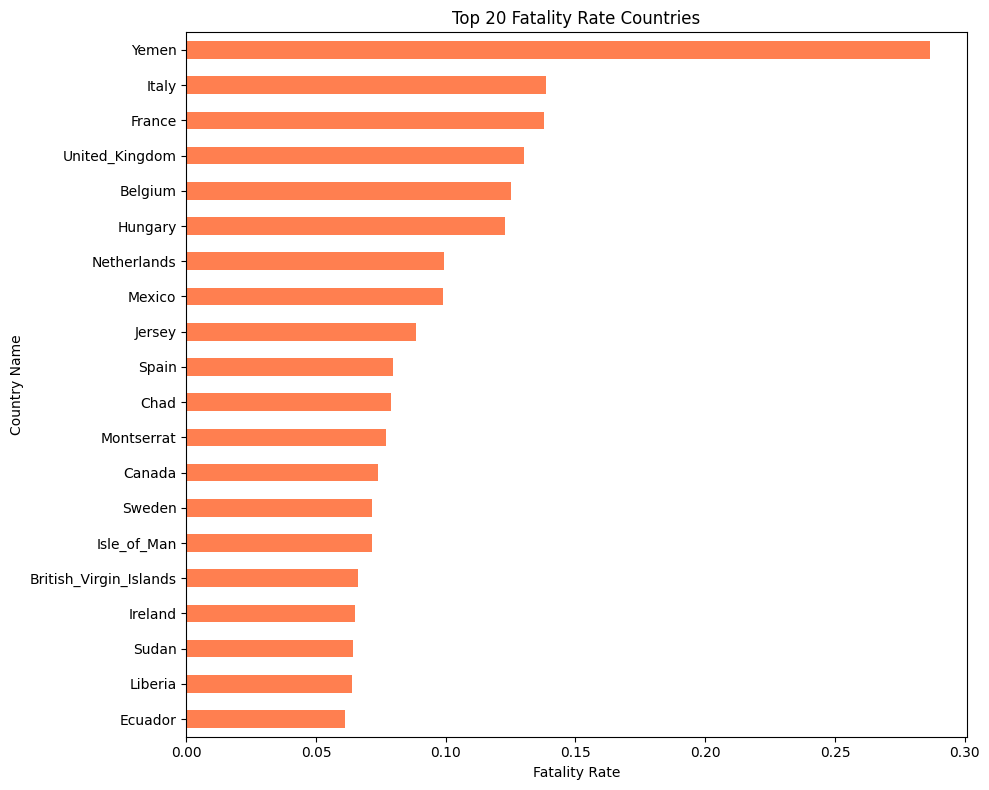

In [31]:
plt.figure(figsize=(10,8))
df_top_20_fatality_rate_on_august["fatality_ratio"].sort_values(ascending=True).plot(kind='barh',color='coral')
plt.title('Top 20 Fatality Rate Countries')
plt.xlabel('Fatality Rate')
plt.ylabel('Country Name')
plt.tight_layout()
plt.show()

**ASEAN Covid-19 Cases Analysis**

In [38]:
asean_countries_id = ["ID", "MY", "SG", "TH", "VN"]
filter_list = [(df_normalized['geo_id'] == country_id).to_numpy() for country_id in asean_countries_id]
filter_array = np.column_stack(filter_list).sum(axis=1, dtype='bool')
df_normalized_asean = df_normalized[filter_array].sort_index()

In [48]:
df_normalized_asean['country_name'].unique()

array(['Malaysia', 'Vietnam', 'Thailand', 'Singapore', 'Indonesia'],
      dtype=object)

In [60]:
df_normalized_asean.head()

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name,fatality_ratio
date,,,,,,,
2019-12-31,0,0,0,0,MY,Malaysia,NaN
2019-12-31,0,0,0,0,VN,Vietnam,NaN
2019-12-31,0,0,0,0,TH,Thailand,NaN
2019-12-31,0,0,0,0,SG,Singapore,NaN
2019-12-31,0,0,0,0,ID,Indonesia,NaN


In [61]:
df_normalized_asean[df_normalized_asean['confirmed_cases'] > 0]

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name,fatality_ratio
date,,,,,,,
2020-01-13,1,0,1,0,TH,Thailand,0.000000
2020-01-14,0,0,1,0,TH,Thailand,0.000000
2020-01-15,0,0,1,0,TH,Thailand,0.000000
2020-01-16,0,0,1,0,TH,Thailand,0.000000
2020-01-17,1,0,2,0,TH,Thailand,0.000000
...,...,...,...,...,...,...,...
2020-12-14,6189,166,617820,18819,ID,Indonesia,0.030460
2020-12-14,1229,4,83475,415,MY,Malaysia,0.004972
2020-12-14,7,0,58320,29,SG,Singapore,0.000497


In [62]:
for country_id in asean_countries_id:
    asean_country = df_normalized_asean[df_normalized_asean["geo_id"]==country_id]
    first_case = asean_country[asean_country["confirmed_cases"]>0][["confirmed_cases","geo_id","country_name"]]
    print(first_case.head(1))

            confirmed_cases geo_id country_name
date                                           
2020-03-02                2     ID    Indonesia
            confirmed_cases geo_id country_name
date                                           
2020-01-25                3     MY     Malaysia
            confirmed_cases geo_id country_name
date                                           
2020-01-24                3     SG    Singapore
            confirmed_cases geo_id country_name
date                                           
2020-01-13                1     TH     Thailand
            confirmed_cases geo_id country_name
date                                           
2020-01-24                2     VN      Vietnam


In [65]:
df_normalized_asean_march_onward = df_normalized_asean[df_normalized_asean.index>='2020-03-01']
df_normalized_asean_march_onward.head()

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name,fatality_ratio
date,,,,,,,
2020-03-01,0,1,42,1,TH,Thailand,0.02381
2020-03-01,4,0,102,0,SG,Singapore,0.00000
2020-03-01,0,0,16,0,VN,Vietnam,0.00000
2020-03-01,0,0,0,0,ID,Indonesia,NaN
2020-03-01,0,0,25,0,MY,Malaysia,0.00000


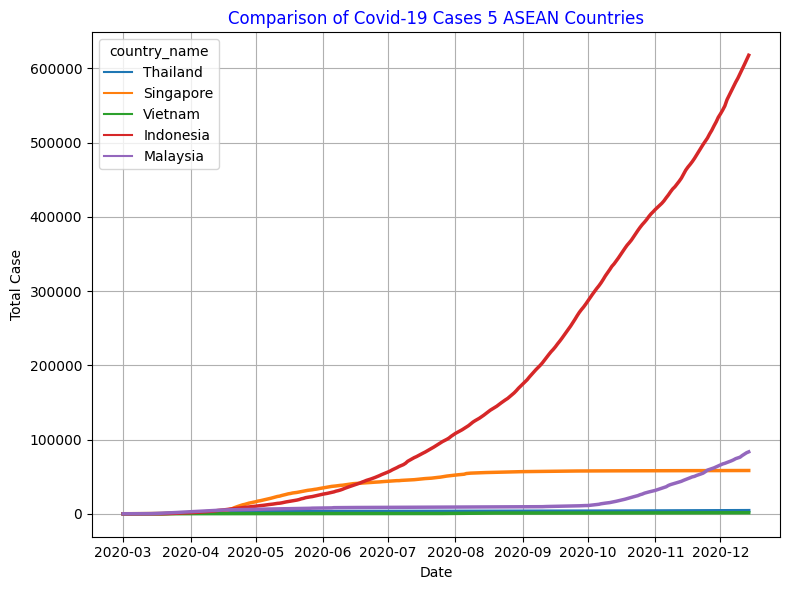

In [70]:
plt.figure(figsize=(8,6))
sns.lineplot(data = df_normalized_asean_march_onward,
            x=df_normalized_asean_march_onward.index,
            y='confirmed_cases',
            hue='country_name',
            linewidth=2.5)
plt.title('Comparison of Covid-19 Cases 5 ASEAN Countries', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Case')
plt.grid()
plt.tight_layout()
plt.show()